In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.linear_model import Ridge
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from pandas import DataFrame
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('..\Initial_data\K5T3\K5T3_cor.csv', ";")
df

C:\Users\arufa\AppData\Local\Temp\ipykernel_10368\2992283757.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('..\Initial_data\K5T3\K5T3_cor.csv', ";")


,K5PS14_1.PV,K5PS14_2.PV,K5L1_1.PV,K5L1_2.PV,K5L1_3.PV,K5L1_4.PV,K5P5_1.PV,K5P5_2.PV,K5BSB_1.PV,K5BSB_2.PV,...,K5T2_1.PV,K5T2_2.PV,K0P102_1.PV,K0T104_2.PV,K5F6X.PV,K5T16.PV,K5T15.PV,K5P8.PV,K5T17.PV,K5L2.PV
0,4.110403,4.22495,13.78617,4.584234,1.391578,312.5545,-40.092450,-39.37344,38.50135,55.80167,...,418.8025,414.9125,4.090837,399.5566,25.91725,96.04542,109.2933,3.947831,125.8089,272.8238
1,4.112575,4.227241,11.90175,3.316688,-0.64575,312.5571,-39.794660,-39.14466,38.05667,55.72771,...,418.4803,414.5512,4.092775,399.6491,25.95287,95.98844,109.3435,3.949697,125.8541,272.7920
2,4.113778,4.228291,окт.17,2.277516,-1.903453,312.5505,-40.097530,-39.45195,38.08927,55.77531,...,418.1625,414.1656,4.094706,399.5097,25.87472,95.92969,109.4133,3.949778,125.8552,272.5587
3,4.115534,4.230028,10.17877,1.721016,-2.264719,312.5371,-40.044270,-40.01524,38.10891,55.77896,...,418.0356,414.0303,4.096784,399.6128,25.80683,95.83218,109.4946,3.954266,125.7343,273.4935
4,4.119669,4.234331,10.18566,1.616016,-2.435016,312.5414,-39.671490,-38.28672,38.09208,55.95422,...,417.9797,413.9844,4.102347,399.7712,25.68059,95.74865,109.5350,3.957666,125.5335,273.1667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25914,4.160757,3.191344,313.74,-39.79063,55.51906,157.6138,0.232187,28.33871,345.88870,14.23969,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25915,4.159538,2.821219,313.8483,-39.49219,57.77844,157.5200,0.241875,28.28961,345.68440,14.245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25916,4.158431,2.705062,313.868,-40.99766,56.48781,157.4600,0.241875,28.29358,345.76310,14.24844,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25917,4.1577,2.880281,313.8286,-40.63594,57.19375,157.4025,0.244688,28.26398,345.64130,14.22563,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\arufa\AppData\Local\Temp\ipykernel_10368\3345498128.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


<Axes: >

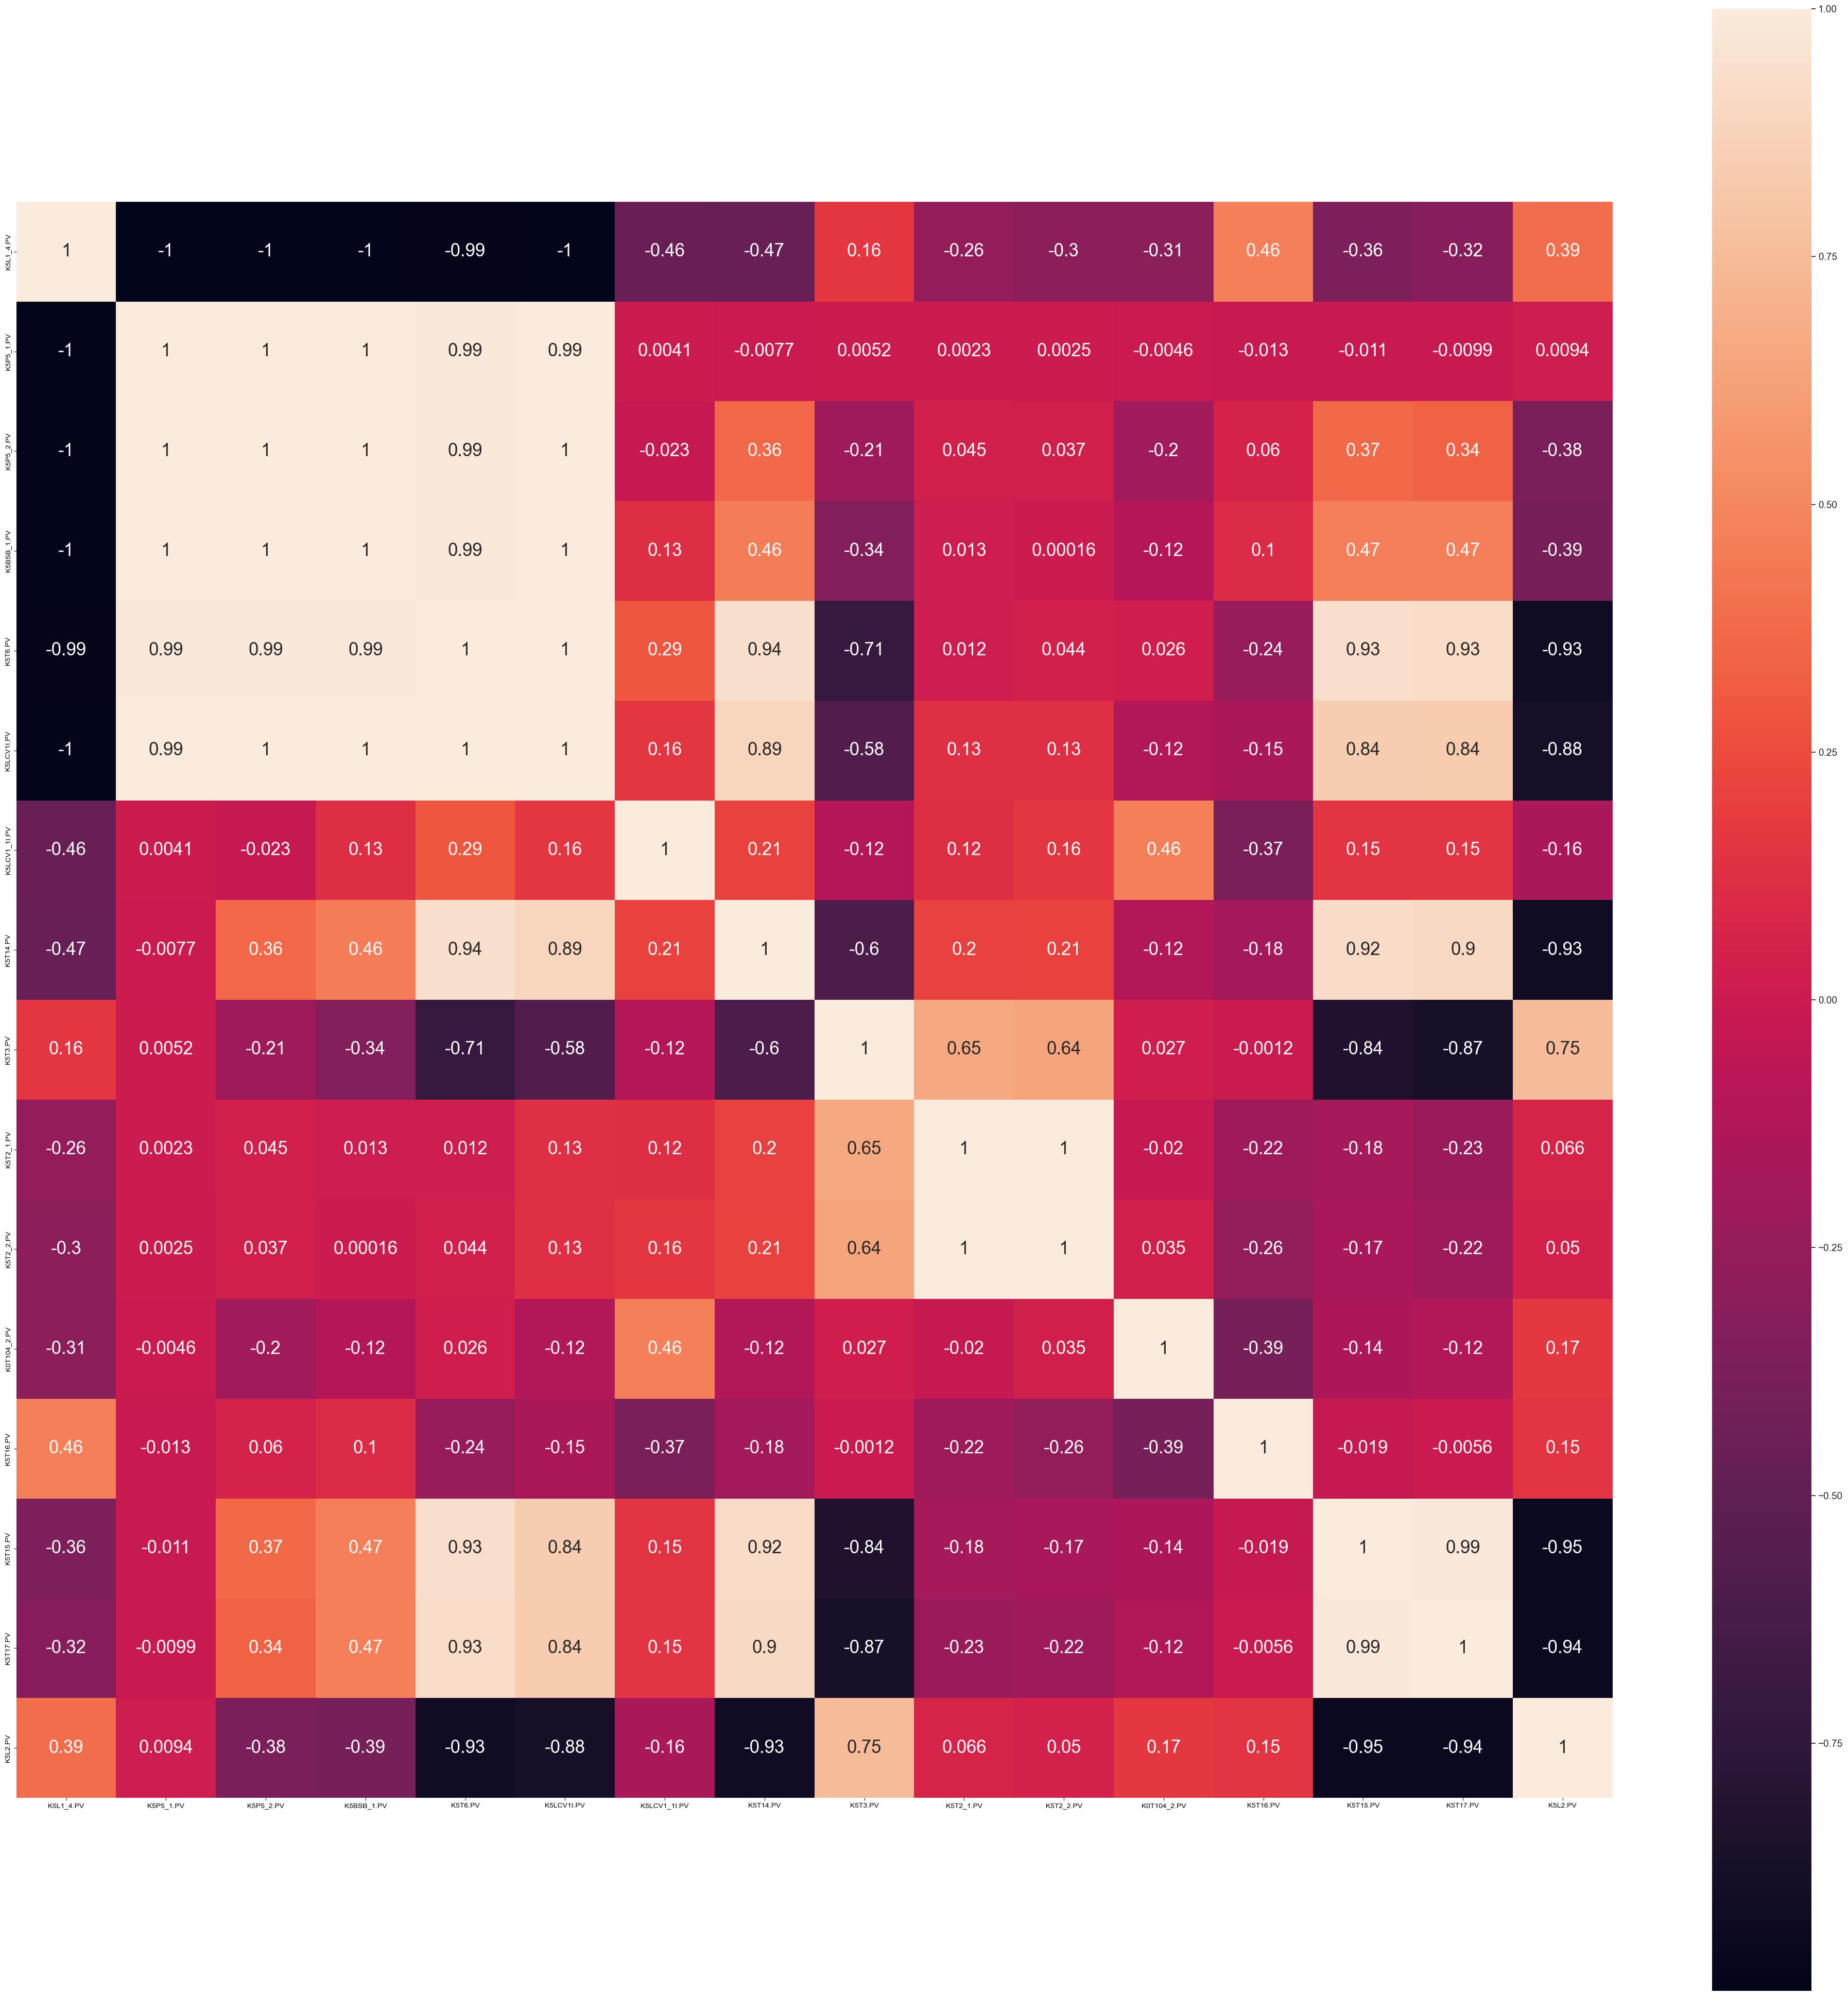

In [3]:
corrmat = df.corr()
fig,ax = plt.subplots(figsize=(50,50))
sns.set(font_scale=1.25)
sns.heatmap(corrmat, annot=True, annot_kws={'size':25}, square=True)

In [190]:
df = pd.read_csv('..\Initial_data\K5T3\K5T3.csv', ";")
df

C:\Users\arufa\AppData\Local\Temp\ipykernel_10368\2527759549.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('..\Initial_data\K5T3\K5T3.csv', ";")


,K5TCV2I.PV,F3
0,47.39250,9.483234
1,46.41276,9.533338
2,44.70984,9.521478
3,44.70703,9.600323
4,44.70698,9.503517
...,...,...
24208,10.33562,5.246708
24209,10.33547,5.246135
24210,10.33479,5.167192
24211,10.33443,5.038903


In [191]:
df=df.dropna()
# Заменяем все не числовые значения на NaN
df = df.replace('[^\d.]', '', regex=True)

# Преобразуем столбцы в числовой тип данных
df = df.apply(pd.to_numeric)
df=df.round(3)
df=df.drop_duplicates(["F3"])
df=df.drop_duplicates(["K5TCV2I.PV"])
# df=df.drop_duplicates(["K5F6X.PV"])
# df=df.drop_duplicates(["K5T15.PV"])
#df=df.drop_duplicates(["K5P8.PV"])
df

,K5TCV2I.PV,F3
0,47.392,9.483
1,46.413,9.533
2,44.710,9.521
3,44.707,9.600
5,44.706,9.160
...,...,...
24041,10.346,4.981
24077,10.345,5.015
24099,10.344,5.017
24133,10.343,5.362


In [192]:
mean = df['F3'].mean()
std_deviation = df['F3'].std()
# Вычисляем Z-оценку для каждого значения в столбце y
df['z_score'] = (df['F3'] - mean) / std_deviation
# Устанавливаем пороговое значение для Z-оценки
threshold = 2

# Идентифицируем и удаляем выбросы
df = df[np.abs(df['z_score']) < threshold]


In [193]:
y = df.drop(['K5TCV2I.PV', 'z_score'], axis=1)
x = df.drop(['F3', 'z_score'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 25)
task = np.linspace(8, 50, 100)[:, np.newaxis]

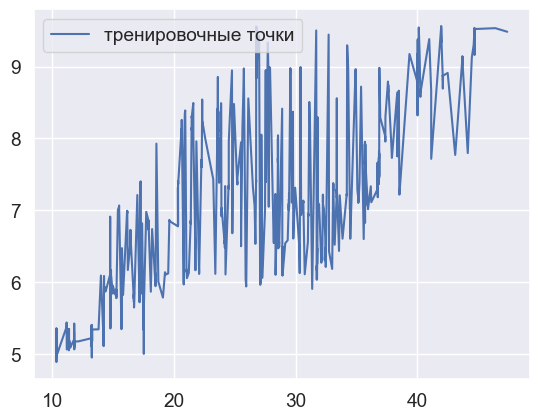

In [194]:
plt.plot(x, y, label = 'тренировочные точки') 
plt.legend(loc='upper left') 
plt.show()

C:\Users\arufa\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


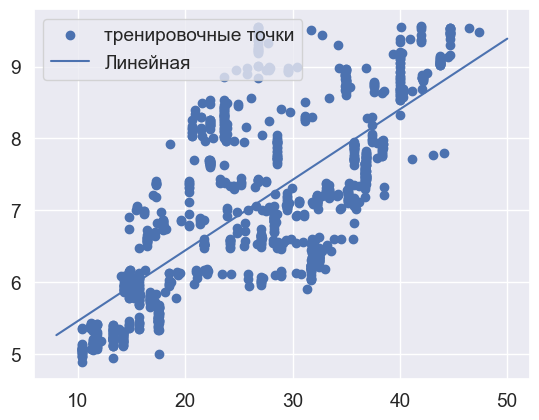

array([0.47791119, 0.5257146 , 0.67949698, 0.57703056, 0.56724602])

In [195]:
lr = LinearRegression() # Линейная регрессия
lr.fit(X_train, y_train) # Обучим линейную регрессию
F5 = lr.predict(task) # Предсказываем y для линейной регрессии
plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, F5, label = 'Линейная') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(lr, X_test, y_test, cv=5)

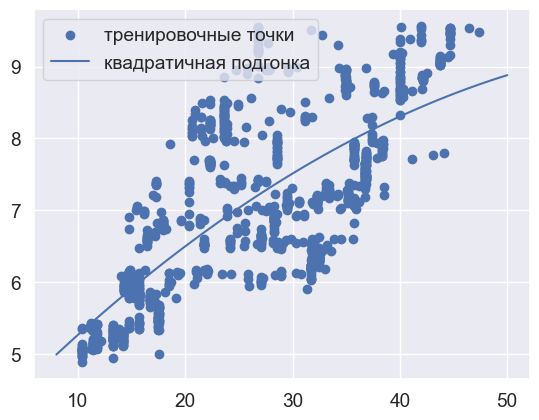

array([0.54531725, 0.63585303, 0.59064446])

In [196]:
pr = LinearRegression() # Линейная регрессия
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X_train)       # Преобразуем данные
pr.fit(X_quad, y_train) # Обучаем полиномиальную регрессию
y_pr = pr.predict(quadratic.fit_transform(task)) # Предсказываем y для полиномиальной регрессии

plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr, X_test, y_test, cv=3)

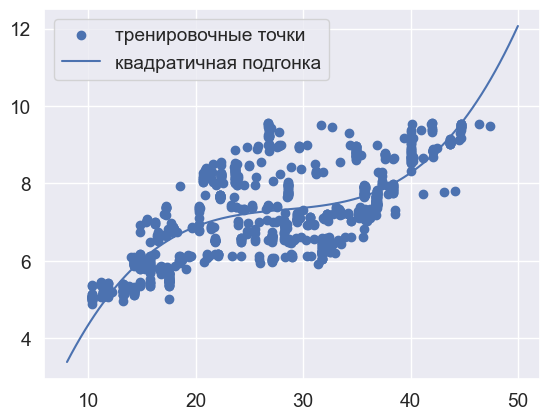

array([0.57770843, 0.60994148])

In [197]:
pr_3 = LinearRegression()
cube = PolynomialFeatures(degree=3)
X_cub = cube.fit_transform(X_train)   
pr_3.fit(X_cub, y_train)
y_pr = pr_3.predict(cube.fit_transform(task))
plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr_3, X_test, y_test, cv=2)

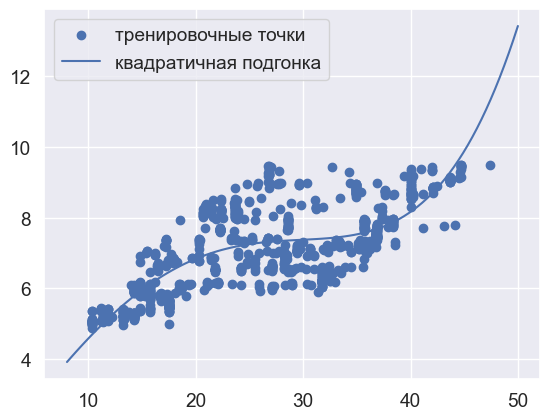

array([0.62606877, 0.5834047 ])

In [170]:
pr_4 = LinearRegression()
Fig = PolynomialFeatures(degree=4)
X_15 = Fig.fit_transform(X_train)   
pr_4.fit(X_15, y_train)
y_pr_4 = pr_4.predict(Fig.fit_transform(task))

plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr_4, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr_4, X_test, y_test, cv=2)

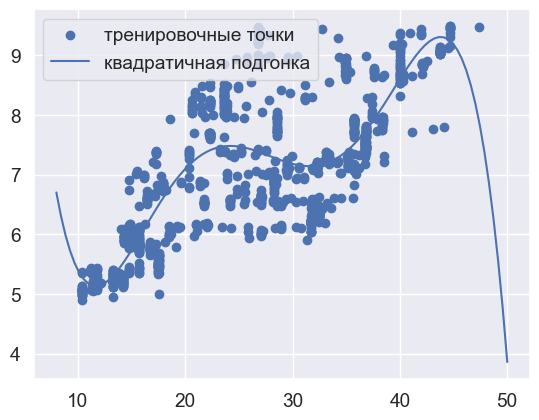

array([0.62606877, 0.5834047 ])

In [171]:
pr_5 = LinearRegression()
Fig = PolynomialFeatures(degree=5)
X_5 = Fig.fit_transform(X_train)   
pr_5.fit(X_5, y_train)
y_pr_5 = pr_5.predict(Fig.fit_transform(task))

plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr_5, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr_5, X_test, y_test, cv=2)

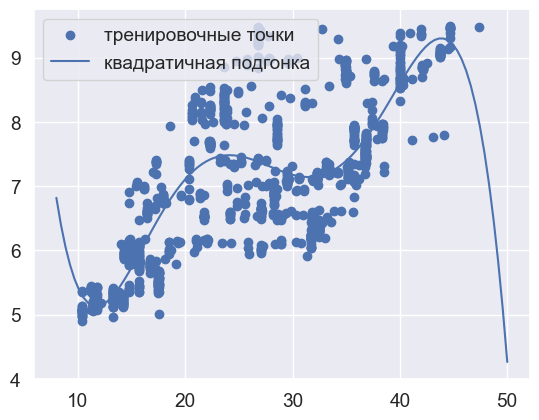

array([0.62606877, 0.5834047 ])

In [172]:
pr_6 = LinearRegression()
Fig = PolynomialFeatures(degree=6)
X_6 = Fig.fit_transform(X_train)   
pr_6.fit(X_6, y_train)
y_pr_6 = pr_6.predict(Fig.fit_transform(task))

plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(task, y_pr_6, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
cross_val_score(pr_6, X_test, y_test, cv=2)

In [173]:
lasso = MultiTaskLassoCV(cv=5, random_state=10).fit(x, y)
lasso.score(x, y)
clf = Ridge(alpha=0.5)
clf.fit(x, y)
#y_pr=clf.predict(task)
#plt.scatter(x, y, label = 'тренировочные точки') 
#plt.plot(task, y_pr, label = 'квадратичная подгонка') 
#plt.legend(loc='upper left') 
#plt.show()
clf.score(X_test, y_test)

0.6064311482494091

In [199]:
import pickle
filename = '../model/K5T3.sav'
pickle.dump(pr_3, open(filename, 'wb'))

In [200]:
loaded_model = pickle.load(open("../model/K5T3.sav", 'rb'))

In [210]:
task2 = {'K5TCV2I.PV':[10]}
df2 = pd.DataFrame(data=task2)
df2

,K5TCV2I.PV
0,10


In [211]:
cube = PolynomialFeatures(degree=3)
loaded_model.predict(cube.fit_transform(df2))

array([[4.35221729]])